## Metrics analysis

In this notebook we focus on the authors of quoatations about climate in years 2018-2020. We get all the essential informations about our climate speakers (as we refer to them) and use those to conduct some first analyses about them. We would like to discover:
* who is quoted the most, when talking about climate;
* what is the distribution between men and women within the climate speakers and does it change througout the years;
* is there an age group outstanding from the others, and why could it be;
* which countries are the most involved in the climate debate;

Our analyses about the speakers will try to answer those questions and see if the noticeable differences are really as they seem to be.
    

# 1. Imports

In [27]:
# general imports
import numpy as np
import pandas as pd
from os import path
from datetime import datetime

# helper functions
from hach.cleaning import *
from hach.metrics import *
from hach.plot_metrics import *
from hach.data import *

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Loading data

### 2.1 Loading the climate dataframes pickles for each year into a dictionary

In [2]:
full_climate_df, climate_dfs = get_climate_data()

### 2.2 Wiki data

In [3]:
# load the labels for wiki data
wiki_labels = pd.read_csv('data/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

### 2.3 Load the wiki speakers pickle

In [4]:
wiki_speakers = pd.read_pickle('data/wiki_speakers.pkl')
wiki_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
Q23762578,None,[+1947-12-20T00:00:00Z],"[Q902, Q843]",[Q6581097],1319692653,None,None,[Q82955],[Q1361491],None,Q23762578,Anisul Islam Mahmud,None,item,[Q432]
Q18199405,None,[+1963-08-13T00:00:00Z],[Q34],[Q6581097],1280534852,None,None,[Q1281618],None,None,Q18199405,Anders Jansson,None,item,None
Q5415483,None,[+1981-11-01T00:00:00Z],[Q30],[Q6581097],1378227353,None,None,"[Q19204627, Q15295720]",None,None,Q5415483,Evan Mathis,None,item,None
Q4911497,"[Warren Wilhelm, Jr., Bill deBlasio, Warren Wi...",[+1961-05-08T00:00:00Z],[Q30],[Q6581097],1393528151,None,None,"[Q82955, Q40348]",[Q29552],None,Q4911497,Bill de Blasio,None,item,None
Q3061333,[Evan Lee Scribner],[+1985-07-19T00:00:00Z],[Q30],[Q6581097],1377322587,None,None,[Q10871364],None,None,Q3061333,Evan Scribner,None,item,None


### 2.4 Load the speakers pickles


In [5]:
speakers = {}
for i in range(2017, 2021):
    speakers[i] = pd.read_pickle('data/speakers_{}.pkl'.format(i))
    # clean the speakers to consider only those below the age of 90 (arbitrary choice to make things simpler)
    speakers[i] = speakers[i][speakers[i].age < 90]

In [6]:
speakers[2018].head()

,speaker,quotation_count,gender,age,nationality,political_party,occupation
0,Donald Trump,415,male,75.0,United States of America,Republican Party,business magnate
1,Catherine McKenna,356,female,50.0,Canada,Liberal Party of Canada,lawyer
2,António Guterres,314,male,72.0,Portugal,Socialist Party,politician
3,Jerry Brown,293,male,83.0,United States of America,Democratic Party,lawyer
4,Narendra Modi,243,male,71.0,India,Bharatiya Janata Party,politician


## 2.4 Cleaning

In [7]:
wiki_speakers = wiki_speakers.drop_duplicates('id')

In [8]:
# cleaning
for i in range(2017, 2021):
    climate_dfs[i] = clean_df(climate_dfs[i])

In [9]:
full_climate_df = clean_df(full_climate_df)

# 3. Metrics

### 3.1 Top speakers

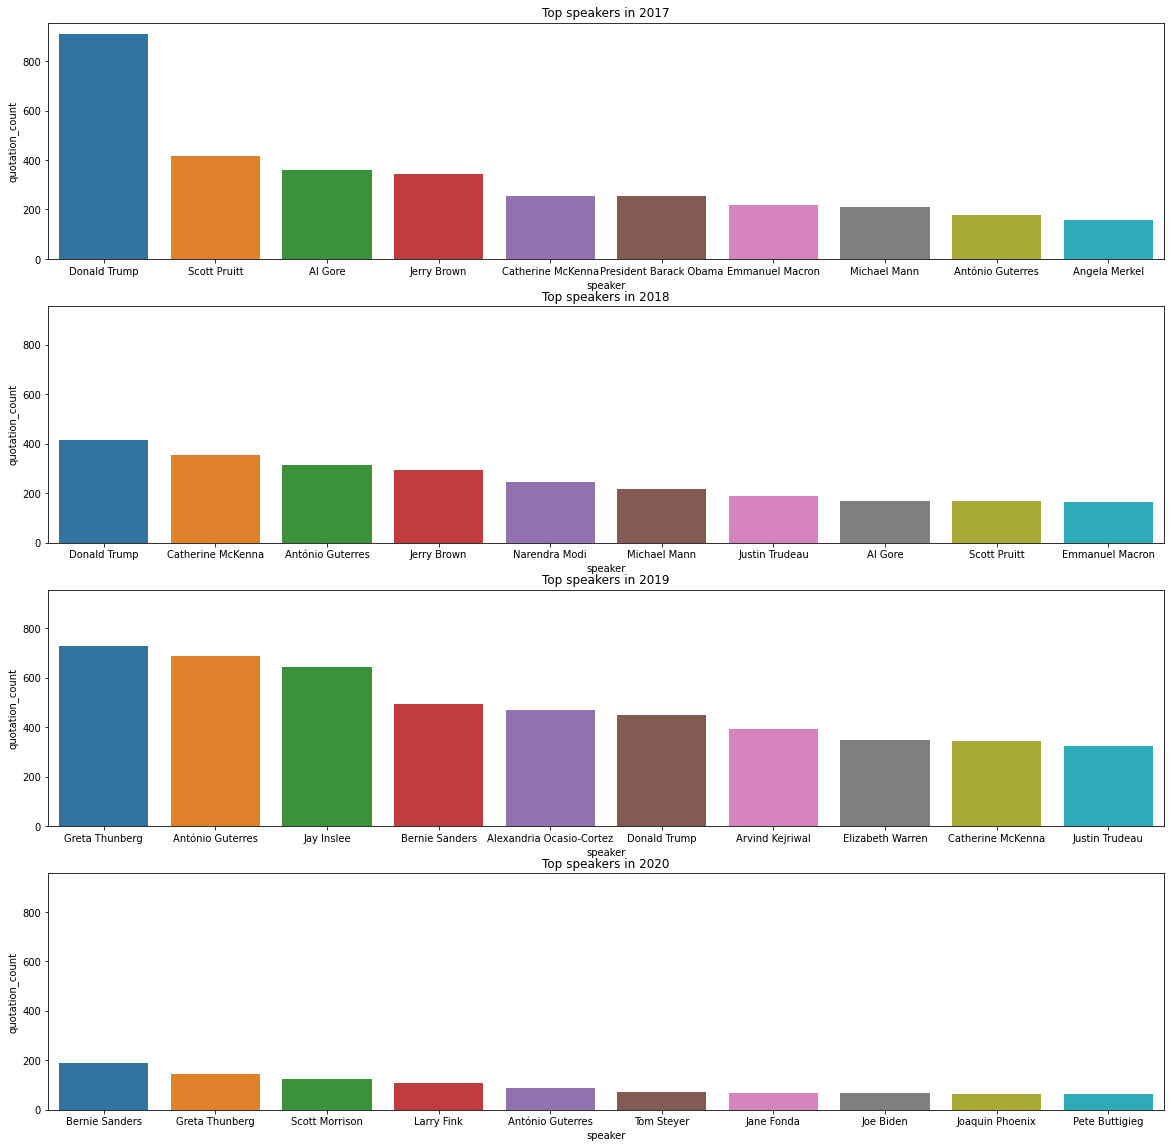

In [10]:
plot_top_speakers(climate_dfs, 10)

In [11]:
# show top quotations from 2017
top_quotations(climate_dfs[2017], 10)

,speaker,quotation,numOccurrences
0,Jason Kessler,This is about an anti-white climate within the...,1579
1,Elon Musk,Climate change is real. Leaving Paris is not g...,1157
2,António Guterres,Climate change is undeniable. Climate Change i...,1017
3,Paolo Gentiloni,a cornerstone in the co-operation between our ...,843
4,Donald Trump,could use a little bit of that good old #Globa...,833
5,Angela Merkel,will combine our forces more resolutely than e...,762
6,Mario Rodriguez,The battle against climate change is irreversi...,717
7,Donald Trump,Perhaps we could use a little bit of that good...,677
8,Donald Trump,"In the East, it could be the COLDEST New Year'...",654
9,Cara Mund,There is evidence that climate change is exist...,596


### 3.2 Gender

Lets see the proportion of men and women talking about climate between 2017 and 2020.

We choose to only compare men and women and not consider the other genders present in the speakers dataset. We made this choice after checking that the other genders (transgender, non-binary, genderqueer, etc.) represent only a tiny percent of all speakers in our datasets.

In [12]:
# example: all the genders in the 2017 speakers dataset
all_genders_2017 = speakers[2017][~speakers[2017].gender.isna()].gender.unique().tolist()
print('All the genders for the speakers dataset in 2017 are: {}'.format(all_genders_2017))
non_binary_percent = speakers[2017][speakers[2017].gender == 'non-binary'].shape[0] / speakers[2017].shape[0]
print('Percentage of non-binary people within the 2017 speakers = {:.2%}'.format(non_binary_percent))

All the genders for the speakers dataset in 2017 are: ['male', 'female', 'transgender female', 'genderfluid', 'non-binary', 'cisgender female', 'transgender male', 'genderqueer']
Percentage of non-binary people within the 2017 speakers = 0.09%


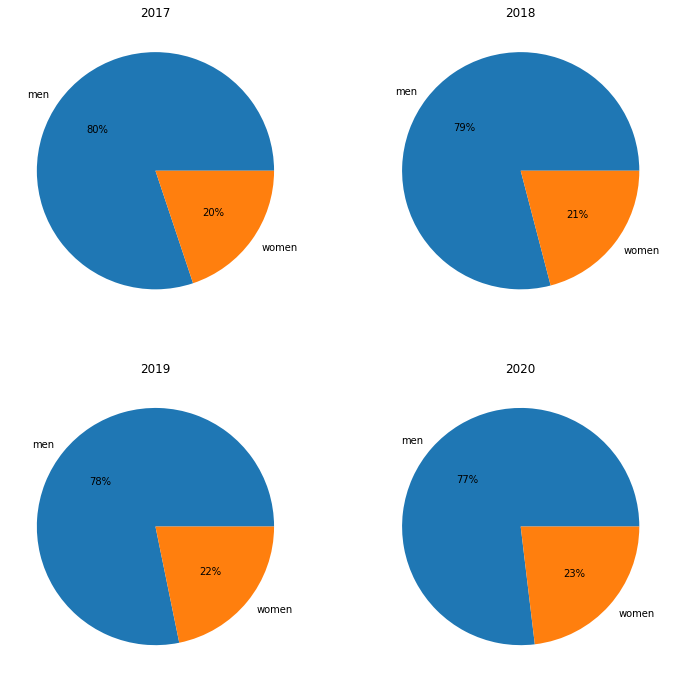

In [21]:
plot_gender(speakers)

As we can observe the proportion of men and women talking about climate related topics remain almost constant during this four year period of time. In fact, one can notice a very small increase by 1% each year in the ratio of women within the climate speakers. Therefore, the difference in the percentage women represent between 2017 and 2020 is 3% and suggests that this tendency could continue later on.

### 3.3 Age

We would also like to compare the distribution of age of the speakers during the years of our interest and see if it somehow changes around 2018 when Greta Thunberg gain in popularity and start inspiring younger people to talk about climate.

In [14]:
all_speakers = get_speakers_by_year(speakers)
all_speakers.age.mean()

56.11000141663125

In [18]:
all_speakers[all_speakers.age == 21]

,speaker,quotation_count,gender,age,nationality,political_party,occupation,year
41,Noah Diffenbaugh,69,male,21.0,None,None,editor-in-chief,2017
117,Ken Caldeira,34,male,21.0,United States of America,None,atmospheric scientist,2017
246,Darren Woods,21,male,21.0,United States of America,None,businessperson,2017
295,Gavin Schmidt,19,male,21.0,United States of America,None,climatologist,2017
356,Paul Billings,16,male,21.0,None,None,geneticist,2017
...,...,...,...,...,...,...,...,...
6431,Greg Asner,1,male,21.0,None,None,scientist,2020
6490,Glenn Schwartz,1,male,21.0,United States of America,None,weather presenter,2020
6720,James Shapiro,1,male,21.0,United Kingdom,None,surgeon,2020
6728,James Annan,1,male,21.0,United Kingdom,None,climatologist,2020


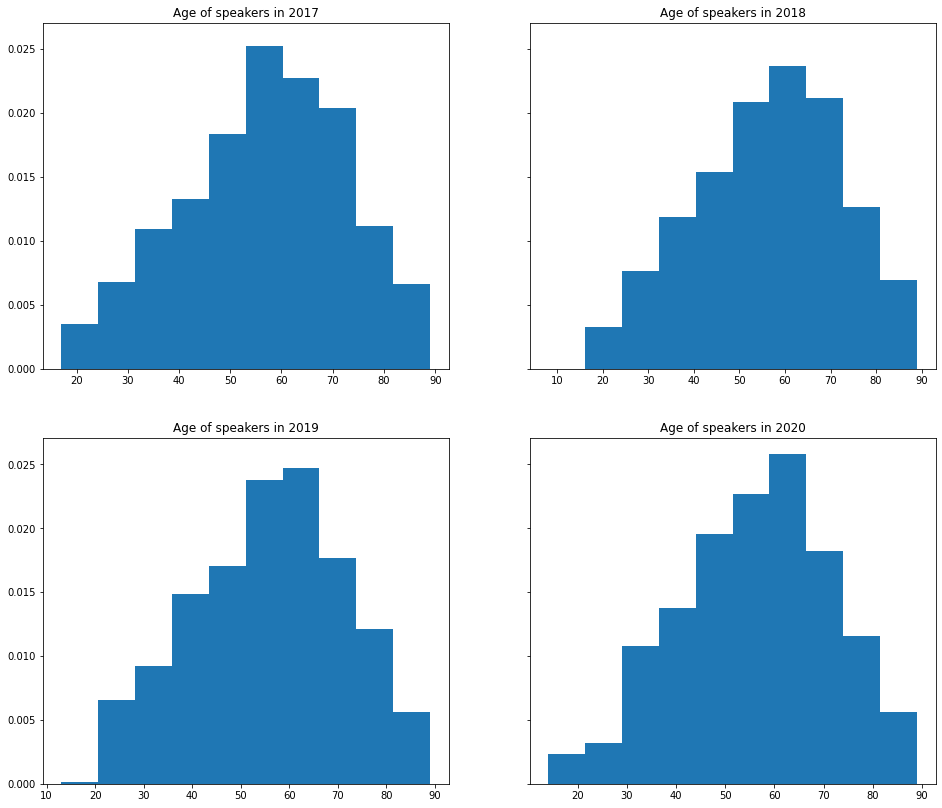

In [22]:
plot_age(speakers)

### 3.4 Nationalities

Plot pie charts

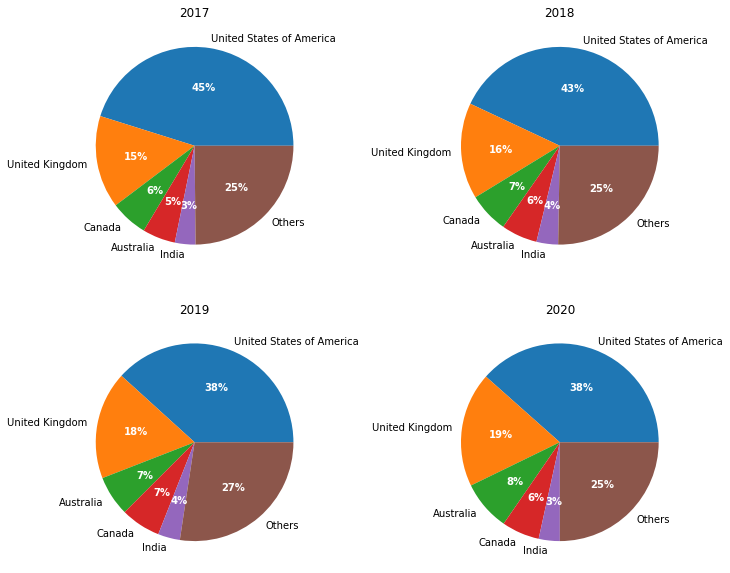

In [41]:
# plot the nationality distribution
plot_nationality_charts(speakers)

### 3.5 Political parties


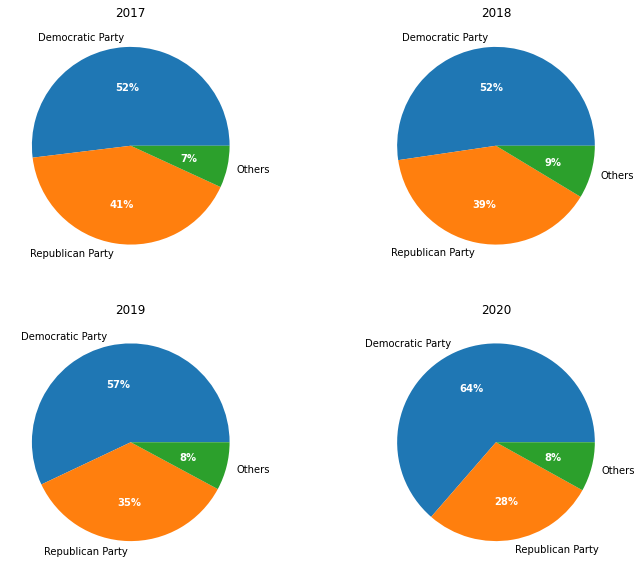

In [40]:
# plot political party distribution in a chosen country
plot_party(speakers, 'United States of America', 0.05)

# 4. Comparisons

### 4.1 Age x complexity

Load the speakers with its complexity and sentiment scores

In [31]:
# load speakers data frame with sentiment and complexity
dfs_speakers = {}
dfs = {}
dfs_mean = {}
for i in range(2017, 2021): 
    dfs[i] = pd.read_pickle('data/climate_df_complexity'+ str(i) +'.pkl')
    dfs[i] = dfs[i].drop(['quoteID', 'qids', 'numOccurrences', 'date', 'probas', 'urls', 'phase'], axis=1)
    dfs_mean[i] = dfs[i].groupby('speaker').mean().reset_index(drop=False)
    dfs_speakers[i] = dfs_mean[i].merge(speakers[i], left_on='speaker', right_on='speaker')
    dfs_speakers[i] = dfs_speakers[i].reset_index(drop=True)

In [33]:
# example: speakers df with their sentiment score and complexity for 2017
dfs_speakers[2017].head()

,speaker,sentiment_score,complexity,quotation_count,gender,age,nationality,political_party,occupation
0,14th Dalai Lama,0.983300,11.00,1,male,86.0,Tibet,None,bhikkhu
1,2 Chainz,-0.887925,6.75,4,male,44.0,United States of America,None,rapper
2,A. CLARK,-0.910900,9.00,1,female,71.0,United Kingdom,None,badminton player
3,A. David Lewis,0.999300,9.00,1,male,44.0,None,None,novelist
4,A. Gilbert,0.999100,13.00,1,None,35.0,None,None,researcher


We plot age vs complexity for all speakers

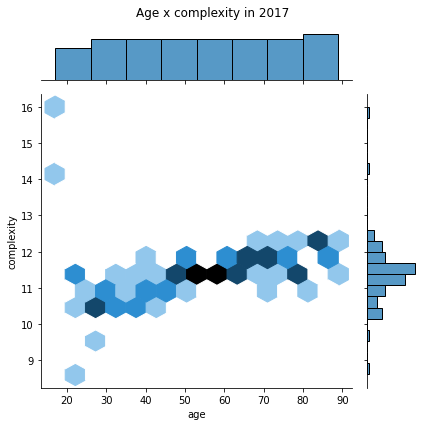

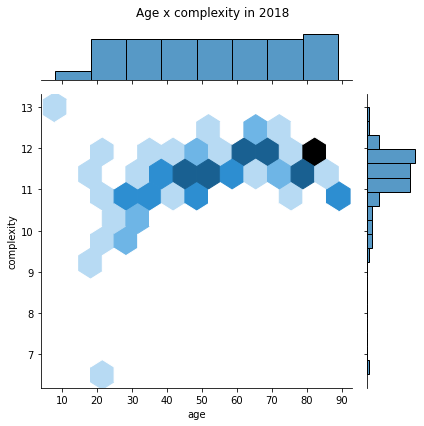

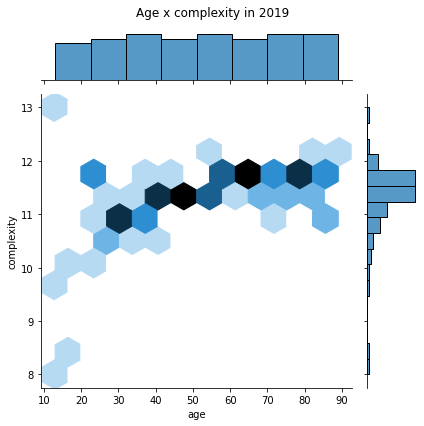

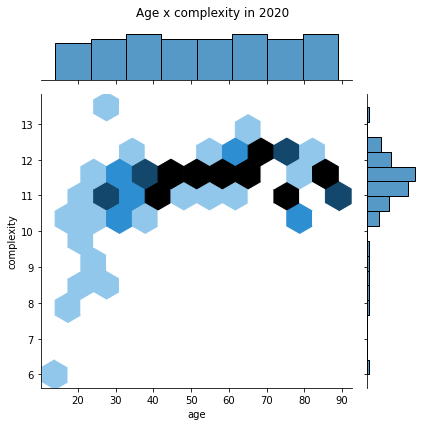

In [38]:
plot_age_complexity(dfs_speakers)

### 4.2 Age x sentiment

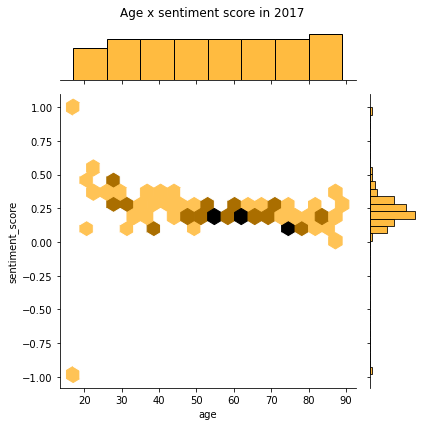

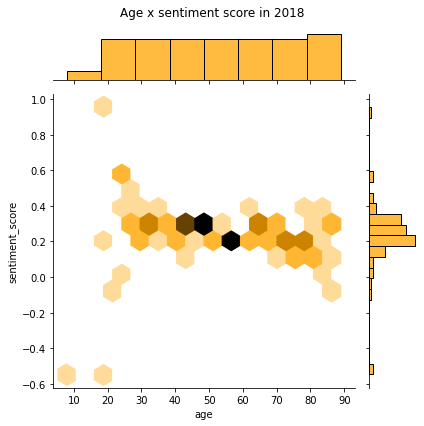

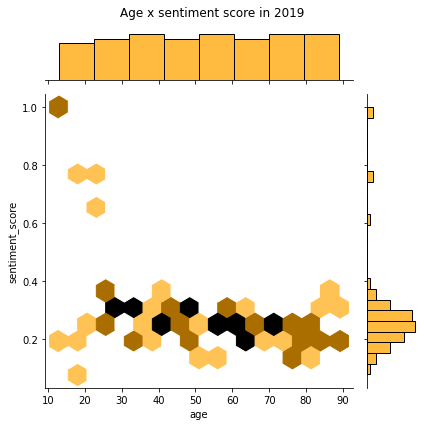

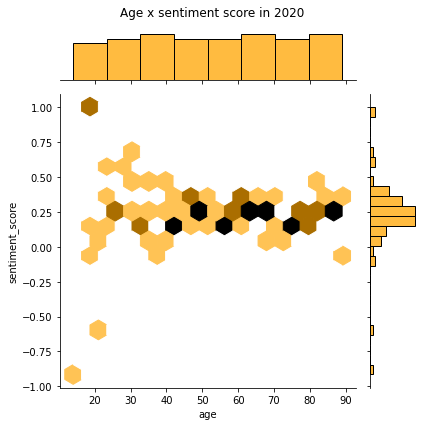

In [39]:
plot_age_sentiment(dfs_speakers)

### 4.3 Gender x complexity x sentiment

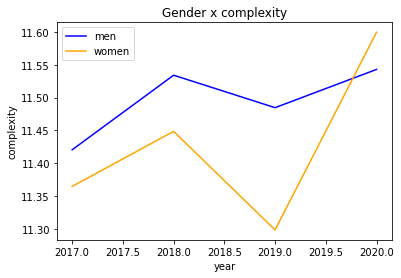

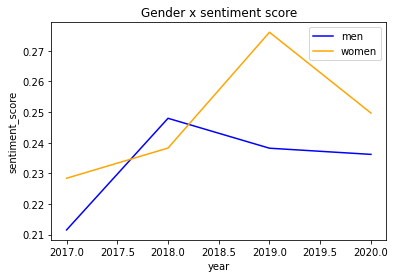

In [31]:
plot_gender_speach(dfs_speakers)

# 5. Plots for the website (plotly)

We have used matplotlib to have a look at our results and know what to use for the website. We are now going to work with another library, Plotly, to export just what we want for the website and make it interactive.

### 5.1 Top 10 speakers

In [42]:
top_speakers2019 = climate_dfs[2019].groupby('speaker')['numOccurrences'].sum().sort_values(ascending=False).to_frame()[:10]
top_speakers2019.reset_index(drop=False, inplace=True)

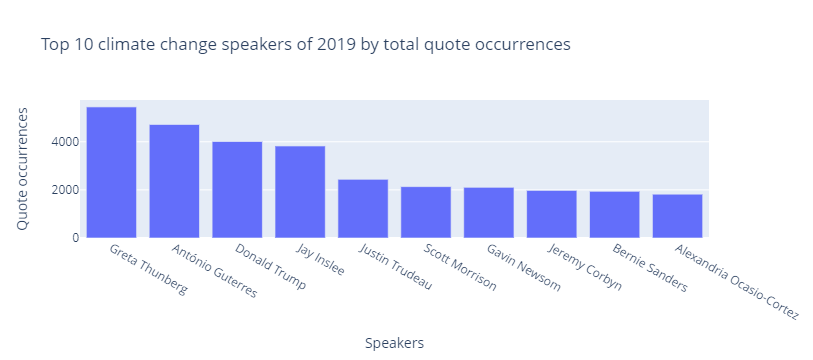

In [43]:
fig = px.bar(top_speakers2019, x="speaker", y="numOccurrences", labels={'numOccurrences': "Quote occurrences", 'speaker':"Speakers"}, title="Top 10 climate change speakers of 2019 by total quote occurrences")
fig.show()
fig.write_html('plots/top_speakers.html', include_plotlyjs='cdn')


### 5.2 Gender

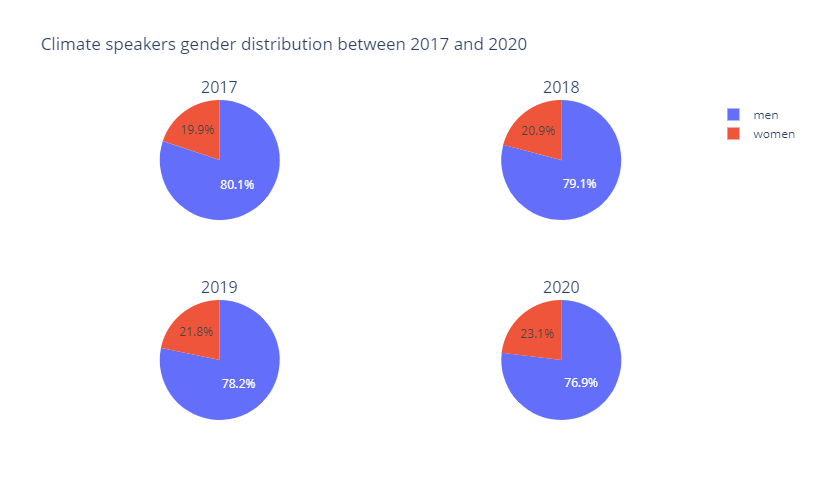

In [48]:
plot_gender(speakers, plotly=True)

### 5.3 Age

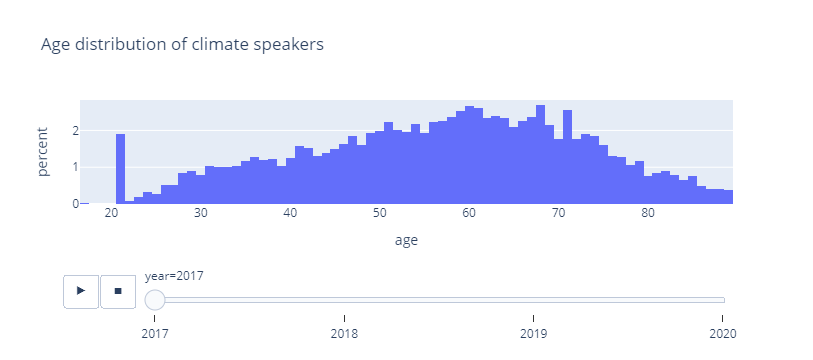

In [44]:
plot_age(speakers, plotly=True)

### 5.4 Greta quotes occurrences

In [45]:
greta_quotes = full_climate_df[full_climate_df.speaker == "Greta Thunberg"]

greta_quotes = greta_quotes.set_index('date')

In [46]:
greta_quotes_sum = greta_quotes.groupby(pd.Grouper(freq="M")).numOccurrences.sum()

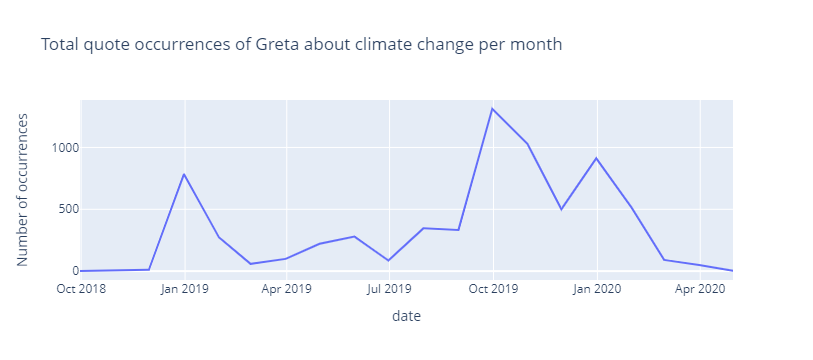

In [47]:
fig = px.line(greta_quotes_sum, y="numOccurrences", labels={'numOccurrences': "Number of occurrences"}, title="Total quote occurrences of Greta about climate change per month")

fig.update_layout({
    "paper_bgcolor": "rgba(0, 0, 0, 0)",
})
fig.show()
fig.write_html('plots/greta_quoted.html', include_plotlyjs='cdn')